In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.lookandcompare import transform_info, transform_headtail, to_doc_info, to_doc_headtail 

dfflight = pd.read_csv('csv/c-flight-activity.csv')
dfloyalty = pd.read_csv('csv/c-loyalty-history.csv')


In [2]:
dfflight.shape

(405624, 10)

In [4]:
dfloyalty.shape

(16737, 16)

In [5]:
dfflight.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [6]:
dfloyalty.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [15]:
round(dfflight.isna().sum()/dfflight.shape[0]*100, 2)

Loyalty Number                 0.0
Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
dtype: float64

In [16]:
round(dfloyalty.isna().sum()/dfloyalty.shape[0]*100, 2)

Loyalty Number         0.00
Country                0.00
Province               0.00
City                   0.00
Postal Code            0.00
Gender                 0.00
Education              0.00
Salary                25.32
Marital Status         0.00
Loyalty Card           0.00
CLV                    0.00
Enrollment Type        0.00
Enrollment Year        0.00
Enrollment Month       0.00
Cancellation Year     87.65
Cancellation Month    87.65
dtype: float64

In [2]:
print(to_doc_headtail(dfflight,'Loyalty Number'))


|    dtype: int64  |   Loyalty Number   |
|-----------|---------------|
||Top 5:
||678205ㅤㅤ0.02%
||499874ㅤㅤ0.01%
||411734ㅤㅤ0.01%
||255475ㅤㅤ0.01%
||528447ㅤㅤ0.01%
||Bottom 5:
||100590ㅤㅤ0.01%
||100642ㅤㅤ0.01%
||100644ㅤㅤ0.01%
||100646ㅤㅤ0.01%
||999891ㅤㅤ0.01%<br><br>Valores únicos: **16737**<br>Número de registros: **405624**<br>Valores nulos: **0**<br>Registros duplicados: **388887**|
---



In [54]:
print(to_doc_headtail(dfloyalty,'Loyalty Number'))


|    dtype: int64  |   Loyalty Number   |
|-----------|---------------|
||Top 5:
||480934ㅤㅤ0.01%
||549612ㅤㅤ0.01%
||429460ㅤㅤ0.01%
||608370ㅤㅤ0.01%
||530508ㅤㅤ0.01%
||Bottom 5:
||823768ㅤㅤ0.01%
||680886ㅤㅤ0.01%
||776187ㅤㅤ0.01%
||906428ㅤㅤ0.01%
||652627ㅤㅤ0.01%<br><br>Valores únicos: **16737**<br>Número de registros: **16737**<br>Valores nulos: **0**<br>Registros duplicados: **0**|
---



In [ ]:
vuelos_por_cliente = dfflight['Loyalty Number'].value_counts()
print(f'El máximo número de vuelos por cliente es: {vuelos_por_cliente.max()}')
print(f'El mínimo número de vuelos por cliente es: {vuelos_por_cliente.min()}')


# Vamos a ver la concentración de vuelos por cliente
frecuencia = vuelos_por_cliente.value_counts().sort_index()
frecuencia 



El máximo número de vuelos por cliente es: 72
El mínimo número de vuelos por cliente es: 24


count
24    16574
48      162
72        1
Name: count, dtype: int64

In [ ]:
# Dado que hay un 48,81% de clientes que no han reservado vueltos
# y por lo tanto, no han volado distancia, los excluimos para calcular
# media y mediana

media_distancia = dfflight[dfflight['Distance'] != 0]['Distance'].mean()

mediana_distancia = dfflight[dfflight['Distance'] != 0]['Distance'].median()

print(mediana_distancia)

print(media_distancia)

# Nos quedamos con la mediana porque representa el valor central real del grupo, sin importar los extremos.

2298.0
2361.633876281113


In [ ]:
print(to_doc_headtail(dfflight, 'Points Accumulated'))


|    dtype: float64  |   Points Accumulated   |
|-----------|---------------|
||Top 5:
||0.0ㅤㅤ48.81%
||180.0ㅤㅤ0.19%
||270.0ㅤㅤ0.18%
||288.0ㅤㅤ0.18%
||189.0ㅤㅤ0.17%
||Bottom 5:
||649.5ㅤㅤ0.0%
||471.96ㅤㅤ0.0%
||565.5ㅤㅤ0.0%
||474.12ㅤㅤ0.0%
||556.25ㅤㅤ0.0%<br><br>Valores únicos: **1549**<br>Número de registros: **405624**<br>Valores nulos: **0**<br>Registros duplicados: **404075**|
---



In [35]:
def median_a(df, column, unwantedvalue):
    median = df[df[column] != unwantedvalue][column].median()
    mean = df[df[column] != unwantedvalue][column].mean()

    print(f'Median -> {column}: {median}\nMean -> {column}: {mean}')


median_a(dfflight,'Points Accumulated', 0.0)

Median -> Points Accumulated: 235.0
Mean -> Points Accumulated: 241.64259964745318


In [15]:
print(to_doc_headtail(dfflight, 'Points Redeemed'))


|    dtype: int64  |   Points Redeemed   |
|-----------|---------------|
||Top 5:
||0ㅤㅤ94.04%
||447ㅤㅤ0.03%
||523ㅤㅤ0.02%
||443ㅤㅤ0.02%
||516ㅤㅤ0.02%
||Bottom 5:
||858ㅤㅤ0.0%
||869ㅤㅤ0.0%
||834ㅤㅤ0.0%
||859ㅤㅤ0.0%
||862ㅤㅤ0.0%<br><br>Valores únicos: **587**<br>Número de registros: **405624**<br>Valores nulos: **0**<br>Registros duplicados: **405037**|
---



In [18]:
registros_puntos_r = dfflight['Points Redeemed'].value_counts()

registros_puntos_r

Points Redeemed
0      381443
447       103
523       100
443        98
516        97
        ...  
858         1
869         1
834         1
859         1
862         1
Name: count, Length: 587, dtype: int64

In [53]:
top_redimidores = dfflight[dfflight['Points Redeemed'] > 200]
print(f'El número de clientes que usa sus puntos es: {top_redimidores['Loyalty Number'].nunique()}\n')

# Agrupamos por 'Loyalty Number' para sumar los puntos redimidos por cada ID única
redenciones_por_cliente = dfflight.groupby('Loyalty Number')['Points Redeemed'].sum().reset_index()

# Filtramos clientes que redimieron más de 200 puntos en total
top_redimidores = redenciones_por_cliente[redenciones_por_cliente['Points Redeemed'] > 200]

# Mostrar los resultados
top_redimidores.sort_values(by='Points Redeemed', ascending=False)

El número de clientes que usa sus puntos es: 11560



,Loyalty Number,Points Redeemed
8162,539704,4479
2088,211755,4336
6285,438707,4301
11114,696609,4282
3337,279419,4221
...,...,...
2488,235454,293
5232,382671,292
15059,909066,291
10905,685314,291


In [48]:
top_redimidores.sort_values(by='Points Redeemed', ascending=True)

,Loyalty Number,Points Redeemed
7190,486890,289
15059,909066,291
10905,685314,291
5232,382671,292
8564,561251,293
...,...,...
3337,279419,4221
11114,696609,4282
6285,438707,4301
2088,211755,4336


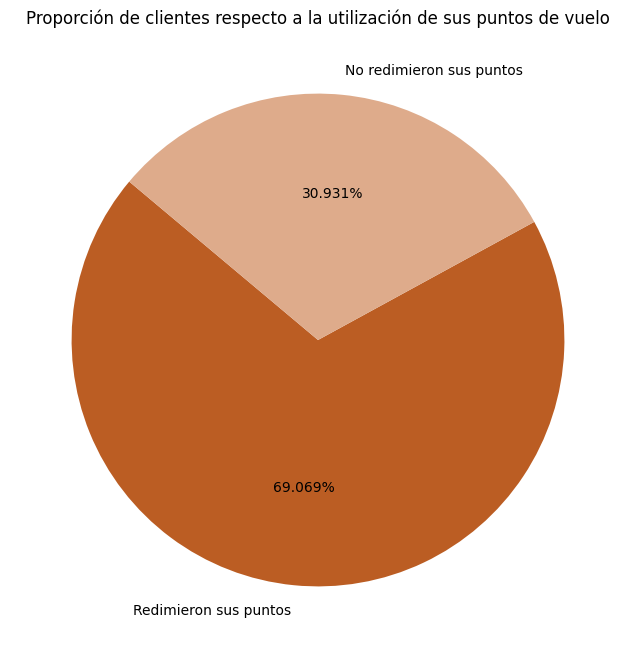

In [58]:
# Calculamos clientes únicos que han redimido puntos
c_red = dfflight[dfflight['Points Redeemed'] > 0]['Loyalty Number'].nunique()
c_no_red = dfflight['Loyalty Number'].nunique() - c_red

# Para el gráfico
labels = ['Redimieron sus puntos', 'No redimieron sus puntos']
values = [c_red, c_no_red]

# Paso importante: personalizar colores (...)ç
colors = ["#bb5d23","#deab8b"]  

# Visualización de pastel

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%3.3f%%', startangle=140, colors=colors)
plt.title('Proporción de clientes respecto a la utilización de sus puntos de vuelo')
plt.show()



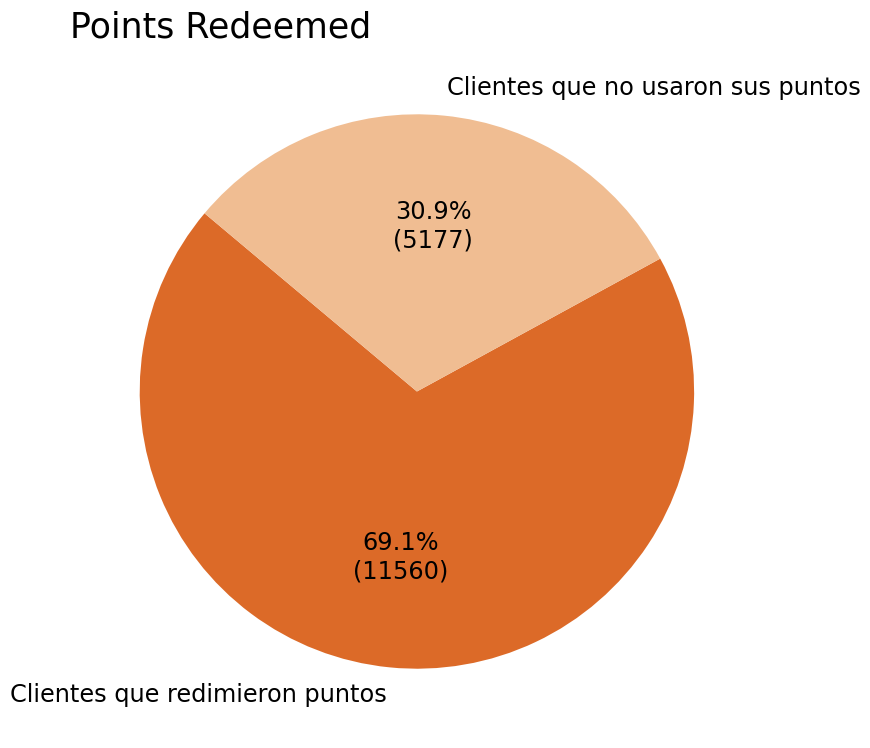

In [84]:
import matplotlib.pyplot as plt

# Datos
clientes_con_redencion = 11560
clientes_sin_redencion = 16737 - clientes_con_redencion
labels = ['Clientes que redimieron puntos', 'Clientes que no usaron sus puntos']
values = [clientes_con_redencion, clientes_sin_redencion]
colors = ["#dc6a28", "#f0bd92"]

# Función para mostrar porcentaje y número
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val})'
    return my_autopct

# Crear gráfico de pastel con tamaño de letra grande
plt.figure(figsize=(9,9))
plt.pie(values, labels=labels, autopct=make_autopct(values),
        startangle=140, colors=colors, textprops={'size': 'xx-large', 'weight': 'normal'})
plt.title('Points Redeemed', fontsize=25, loc = 'left')
plt.show()
